# DSC 550 - Final Project
### Ashley Deibler


## Milestone 1 - Week 6 

In [49]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from tabulate import tabulate

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [50]:
df = pd.read_csv('C:/Users/diggy/DSC550-Deibler/bird_strikes.csv')
df.head()

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [52]:
df.describe()

,record_id,wildlife_number_struck_actual,cost_total,feet_above_ground,number_of_people_injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


## Questions
### 1. What is the most common impact of wildlife strike to flights?  
### 2. What bird species most commonly collide with aircraft?
### 3. How high do strikes usually happen?
### 4. Which airlines strike the most? 
### 5. Which phase of flight is most commonly impacted by strikes? 
### 6. Do sky conditions impact wildlife strikes?

## 1. . What is the most common impact of wildlife strike to flights?

In [53]:
flight_impact = df['effect_impact_to_flight'].value_counts()

impact_pie = px.pie(flight_impact,
                   values = flight_impact.values,
                   names = flight_impact.index,
                   color = flight_impact.index,
                   title = 'Impact of Wildlife Strike to Flight',
                   labels = {'values': 'Frequency', 'names': 'Impact to Flight'},
                   hole = .4)

impact_pie.update_traces(textinfo = 'label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

impact_pie.update_layout(
    font = dict(size=14, color = 'black'),
    height = 500,
    template = 'seaborn')

impact_pie.show()

## 2.  What bird species most commonly collide with aircraft?

In [54]:
species = df['wildlife_species'].value_counts().head(50)

species_treemap = px.treemap(names = species.index, parents=['Top 50 Species'] * len(species),
                            values = species.values,
                            title = 'Top 50 Species Involved in Aircraft Strikes',
                             color = species.values,
                             color_continuous_scale='earth')

species_treemap.update_layout(
font = dict(size = 14, color='black'),
coloraxis_colorbar=dict(title='Frequency'),
height = 800,
template = 'seaborn')

species_treemap

## 3. How high do strikes usually happen?

In [55]:
altitude = df['altitude_bin'].value_counts()

alt_fig = px.bar(altitude, y = altitude.index, x=altitude.values,
                title = 'Altitude of Strikes (feet)',
                labels = {'altitude_bin': 'Altitude', 'x':'Frequency'},
                 color_continuous_scale = 'PuBuGn')

alt_fig.update_layout(
font=dict(size=14, color='black'),
coloraxis_colorbar=dict(title='Altitude of Strikes'),
height=600,
template='seaborn')

alt_fig

## 4. Which airlines strike the most? 

In [56]:
top_airlines = df['aircraft_airline_operator'].value_counts().head(20).sort_values(ascending=True)

airlines_fig = px.bar(top_airlines, y = top_airlines.index, x = top_airlines.values,
                     title='Top 30 Airlines Involved in Bird Strikes',
                     orientation = 'h',
                     color = top_airlines.values,
                     color_continuous_scale='Sunset',
                     labels={'aircraft_airline_operator':'Airlines', 'x':'Frequency'})

airlines_fig.update_layout(
font=dict(size=14, color='black'),
coloraxis_colorbar=dict(title='Frequency'),
height=600,
template='plotly_white')

airlines_fig

## 5. Which phase of flight is most commonly impacted by strikes? 

In [57]:
phase = df['when_phase_of_flight'].value_counts().sort_values(ascending=True)

phase_fig = px.bar(phase, y=phase.index, x=phase.values,
                  title='Phase of Flight During Which Strike Occurs',
                  orientation='h',
                  text=phase.values,
                  color=phase.values,
                  color_continuous_scale='Teal',
                  labels={'when_phase_of_flight':'Phase', 'x':'Frequency'})

phase_fig.update_layout(
font=dict(size=14,color='black'),
coloraxis_colorbar=dict(title='Frequency'),
height=700,
template='plotly_white')

phase_fig.show()

## 6. Do sky conditions impact wildlife strikes?

In [58]:
conditions = df['conditions_sky'].value_counts().sort_values(ascending=True)

conditions_fig=px.bar(conditions, y=conditions.index, x=conditions.values,
                     title='Weather Conditions When Strike Occurred',
                     orientation='h',
                     color=conditions.values,
                     color_continuous_scale='GnBu',
                     labels = {'conditions_sky':'Conditions', 'x':'Frequency'})

conditions_fig.update_layout(
font=dict(size=14, color='black'),
coloraxis_colorbar=dict(title='Frequency'),
height = 600,
template = 'plotly_white')


conditions_fig

## Milestone 2 - Week 8

In [59]:
df = pd.read_csv('C:/Users/diggy/DSC550-Deibler/bird_strikes.csv')
df.head()

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False


In [60]:
# Find column names
for col in df.columns:
    print(col)

record_id
aircraft_type
airport_name
altitude_bin
aircraft_make_model
wildlife_number_struck
wildlife_number_struck_actual
effect_impact_to_flight
flightdate
effect_indicated_damage
aircraft_number_of_engines
aircraft_airline_operator
origin_state
when_phase_of_flight
conditions_precipitation
remains_of_wildlife_collected
remains_of_wildlife_sent_to_smithsonian
remarks
wildlife_size
conditions_sky
wildlife_species
pilot_warned_of_birds_or_wildlife
cost_total
feet_above_ground
number_of_people_injured
is_aircraft_large


#### Reminder of Investigating Questions: 
1. What is the most common impact of wildlife strike to flights?
2. What bird species most commonly collide with aircraft?
3. How high do strikes usually happen?
4. Which airlines strike the most?
5. Which phase of flight is most commonly impacted by strikes?
6. Do sky conditions impact wildlife strikes?

#### Will drop the following columns:

    aircraft_type - I will not need to know what type of aircraft was involved in the strike for this investigation.
    
    aircraft_make_model - I am not using this investigation to determine what types of aircrafts are involved in strikes. The make and model are not relevent to the questions I am investigating.
    
    wildlife_number_struck - This column separates the numbers of wildlife struck into bins, I plan to use the column providing the raw number of struck wildlife (wildlife_number_struck_actual) rather than the binned numbers. 
    
    aircraft_number_of_engines - This study revolves around conditions under which strikes occur, so knowing the number of engines on the aircraft is not relevent to this study. 
    
    remains_of_wildlife_collected - The data I am looking at pertains primarily to identifiable wildlife, and that information is present in another column (wildlife_species), so knowing whether or not the remains were collected is not relevent. 
    
    remains_of_wildlife_sent_to_smithsonian - This data is not relevent either, as it is tied to the previous deleted column (remains_of_wildlife_collected). Knowing whether wildlife remains are sent to Smithsonian museum is not relevent to this study. 
    
    cost_total - The total cost in damages and repairs is not relevent to this study, as it doesn't pertain to the environmental conditions in which these strikes occur. 
    
    remarks - The remarks provided for each incident are inconsistent in the types of information they provide. Some discuss what the pilot saw before the strike, some discuss the wildlife involved, some involve information about damages. Because there is no pattern as to what information can be gathered from this column, it isn't very helpful in looking at conditions and causes of wildlife strikes. 
    
    wildlife_size - The size of the wildlife is not necessarily relevent to this study, and this information is also already somewhat tied into the column 'wildlife_species', as we are able to infer the size of the wildlife based on species. In addition, some of the observations of wildlife_species don't specify species name, but instead classify it as 'Unknown large' or 'unknown medium' etc. 
    
    pilot_warned_of_birds_or_wildlife - Whether the pilot was informed of wildlife or birds in the area isn't relevent to this study, as it likely wouldn't make much of a difference whether the pilot was aware or not, as it would be difficult to maneuver a large aircraft around small flocks of wildlife. 
    

In [61]:
df.drop(columns=['aircraft_type', 'aircraft_make_model', 'wildlife_number_struck',
             'aircraft_number_of_engines', 'remains_of_wildlife_collected',
             'remains_of_wildlife_sent_to_smithsonian', 'cost_total', 'remarks', 'wildlife_size',
             'pilot_warned_of_birds_or_wildlife'], inplace=True)

In [62]:
df.head()

,record_id,airport_name,altitude_bin,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,conditions_sky,wildlife_species,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,LAGUARDIA NY,> 1000 ft,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,US AIRWAYS*,New York,Climb,NaN,No Cloud,Unknown bird - medium,1500.0,0,True
1,208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,424,NaN,2001-07-25T00:00:00,Caused damage,AMERICAN AIRLINES,Texas,Landing Roll,NaN,Some Cloud,Rock pigeon,0.0,0,False
2,207601,LAKEFRONT AIRPORT,< 1000 ft,261,NaN,2001-09-14T00:00:00,No damage,BUSINESS,Louisiana,Approach,NaN,No Cloud,European starling,50.0,0,False
3,215953,SEATTLE-TACOMA INTL,< 1000 ft,806,Precautionary Landing,2002-09-05T00:00:00,No damage,ALASKA AIRLINES,Washington,Climb,NaN,Some Cloud,European starling,50.0,0,True
4,219878,NORFOLK INTL,< 1000 ft,942,NaN,2003-06-23T00:00:00,No damage,COMAIR AIRLINES,Virginia,Approach,NaN,No Cloud,European starling,50.0,0,False


I also want to remove any columns that have over 50% missing values. These columns wouldn't be very helpful in my investigation as they don't add much information to the overall analysis. 

In [63]:
missing_data = df.isnull().sum()/len(df)
missing_data

record_id                        0.000000
airport_name                     0.005047
altitude_bin                     0.005047
wildlife_number_struck_actual    0.000000
effect_impact_to_flight          0.918695
flightdate                       0.005047
effect_indicated_damage          0.000000
aircraft_airline_operator        0.005047
origin_state                     0.017568
when_phase_of_flight             0.005047
conditions_precipitation         0.921160
conditions_sky                   0.000000
wildlife_species                 0.000000
feet_above_ground                0.005047
number_of_people_injured         0.000000
is_aircraft_large                0.005047
dtype: float64

Both 'effect_impact_to_flight' and 'conditions_precipitation' have over 90% missing values. Due to the lack of information present in each column, I will have to drop them as well. 

In [64]:
data = df.drop(columns=['effect_impact_to_flight', 'conditions_precipitation'])
data

,record_id,airport_name,altitude_bin,wildlife_number_struck_actual,flightdate,effect_indicated_damage,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_sky,wildlife_species,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,LAGUARDIA NY,> 1000 ft,859,2000-11-23T00:00:00,Caused damage,US AIRWAYS*,New York,Climb,No Cloud,Unknown bird - medium,1500.0,0,True
1,208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,424,2001-07-25T00:00:00,Caused damage,AMERICAN AIRLINES,Texas,Landing Roll,Some Cloud,Rock pigeon,0.0,0,False
2,207601,LAKEFRONT AIRPORT,< 1000 ft,261,2001-09-14T00:00:00,No damage,BUSINESS,Louisiana,Approach,No Cloud,European starling,50.0,0,False
3,215953,SEATTLE-TACOMA INTL,< 1000 ft,806,2002-09-05T00:00:00,No damage,ALASKA AIRLINES,Washington,Climb,Some Cloud,European starling,50.0,0,True
4,219878,NORFOLK INTL,< 1000 ft,942,2003-06-23T00:00:00,No damage,COMAIR AIRLINES,Virginia,Approach,No Cloud,European starling,50.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,REDDING MUNICIPAL,> 1000 ft,1,2011-12-30T00:00:00,No damage,SKYWEST AIRLINES,California,Approach,Overcast,Unknown bird - large,1500.0,0,False
25554,319677,ORLANDO INTL,< 1000 ft,1,2011-12-30T00:00:00,No damage,US AIRWAYS,Florida,Landing Roll,Some Cloud,Tree swallow,0.0,0,False
25555,319680,NaN,NaN,1,NaN,No damage,NaN,Virginia,NaN,No Cloud,Unknown bird - small,NaN,0,NaN
25556,319679,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,1,2011-12-31T00:00:00,No damage,DELTA AIR LINES,Michigan,Landing Roll,Some Cloud,Unknown bird - medium,0.0,0,True


I now need to fill in missing values. 

In [65]:
# Missing values in 'airport_name' will be filled with 'Unknown'

data['airport_name'] = data['airport_name'].fillna('UNKNOWN')

In [66]:
# Missing values in 'altitude_bin' will be filled with the mode. 

print(data['altitude_bin'].value_counts())

# most entries lie within the '< 1000 ft' range, so all missing values will be filled with that. 

altitude_bin
< 1000 ft    20556
> 1000 ft     4873
Name: count, dtype: int64


In [67]:
data['altitude_bin'] = data['altitude_bin'].fillna('< 1000 ft')

In [68]:
# Missing values in 'flightdate' will be filled with 'unknown'
data['flightdate'] = data['flightdate'].fillna('UNKNOWN')

In [69]:
# Missing values in 'aircraft_airline_operator' will be filled with 'unknown'
data['aircraft_airline_operator'] = data['aircraft_airline_operator'].fillna('UNKNOWN')

In [70]:
# 'Missing values in 'origin_state' will be filled with 'unknown'
data['origin_state'] = data['origin_state'].fillna('Unknown')

In [71]:
#  Missing values in 'when_phase_of_flight' will be filled with 'unknown'
data['when_phase_of_flight'] = data['when_phase_of_flight'].fillna('Unknown')

In [72]:
# Missing values in 'is_aircraft_large' will be filled with the mode
data['is_aircraft_large'].value_counts()

# The majority of observations are listed under 'False', so all missing values will be filled with that.

is_aircraft_large
False    17027
True      8402
Name: count, dtype: int64

In [73]:
data['is_aircraft_large'] = data['is_aircraft_large'].fillna('False')

In [74]:
# Missing values for 'feet_above_ground' will be filled with the mean of the column. 

print(df['feet_above_ground'].mean())

# mean for feet_above_ground = 799.03

799.0284321050768


In [75]:
data['feet_above_ground'] = data['feet_above_ground'].fillna('799.03')

In [76]:
# Check to make sure all missing values have been filled

data.isnull().sum()

record_id                        0
airport_name                     0
altitude_bin                     0
wildlife_number_struck_actual    0
flightdate                       0
effect_indicated_damage          0
aircraft_airline_operator        0
origin_state                     0
when_phase_of_flight             0
conditions_sky                   0
wildlife_species                 0
feet_above_ground                0
number_of_people_injured         0
is_aircraft_large                0
dtype: int64

#### I want to rename the columns to make them easier to read and use within the model

In [77]:
data1 = data.rename(columns={'record_id': 'Record ID',
                    'airport_name': 'Airport',
                    'altitude_bin': 'Altitude',
                    'wildlife_number_struck_actual': 'Wildlife Struck',
                    'flightdate': 'Flight Date',
                    'effect_indicated_damage':'Damage',         
                    'aircraft_airline_operator': 'Airline',
                    'origin_state': 'Origin State',
                    'when_phase_of_flight': 'Phase of Flight',
                    'conditions_sky': 'Sky Conditions',
                    'wildlife_species': 'Species',
                    'feet_above_ground': 'Feet Above Ground',
                    'number_of_people_injured': 'Injured Count',
                    'is_aircraft_large': 'Aircraft Large'})

In [78]:
data1

,Record ID,Airport,Altitude,Wildlife Struck,Flight Date,Damage,Airline,Origin State,Phase of Flight,Sky Conditions,Species,Feet Above Ground,Injured Count,Aircraft Large
0,202152,LAGUARDIA NY,> 1000 ft,859,2000-11-23T00:00:00,Caused damage,US AIRWAYS*,New York,Climb,No Cloud,Unknown bird - medium,1500.0,0,True
1,208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,424,2001-07-25T00:00:00,Caused damage,AMERICAN AIRLINES,Texas,Landing Roll,Some Cloud,Rock pigeon,0.0,0,False
2,207601,LAKEFRONT AIRPORT,< 1000 ft,261,2001-09-14T00:00:00,No damage,BUSINESS,Louisiana,Approach,No Cloud,European starling,50.0,0,False
3,215953,SEATTLE-TACOMA INTL,< 1000 ft,806,2002-09-05T00:00:00,No damage,ALASKA AIRLINES,Washington,Climb,Some Cloud,European starling,50.0,0,True
4,219878,NORFOLK INTL,< 1000 ft,942,2003-06-23T00:00:00,No damage,COMAIR AIRLINES,Virginia,Approach,No Cloud,European starling,50.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,REDDING MUNICIPAL,> 1000 ft,1,2011-12-30T00:00:00,No damage,SKYWEST AIRLINES,California,Approach,Overcast,Unknown bird - large,1500.0,0,False
25554,319677,ORLANDO INTL,< 1000 ft,1,2011-12-30T00:00:00,No damage,US AIRWAYS,Florida,Landing Roll,Some Cloud,Tree swallow,0.0,0,False
25555,319680,UNKNOWN,< 1000 ft,1,UNKNOWN,No damage,UNKNOWN,Virginia,Unknown,No Cloud,Unknown bird - small,799.03,0,False
25556,319679,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,1,2011-12-31T00:00:00,No damage,DELTA AIR LINES,Michigan,Landing Roll,Some Cloud,Unknown bird - medium,0.0,0,True


#### Convert DateTime to Date in 'Flight Date' column. 

In [79]:
data1 = data1.drop(data1[data1['Flight Date'] == 'UNKNOWN'].index)

In [80]:
data1['Flight Date'] = pd.to_datetime(data1['Flight Date']).dt.date

data1.head(10)

,Record ID,Airport,Altitude,Wildlife Struck,Flight Date,Damage,Airline,Origin State,Phase of Flight,Sky Conditions,Species,Feet Above Ground,Injured Count,Aircraft Large
0,202152,LAGUARDIA NY,> 1000 ft,859,2000-11-23,Caused damage,US AIRWAYS*,New York,Climb,No Cloud,Unknown bird - medium,1500.0,0,True
1,208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,424,2001-07-25,Caused damage,AMERICAN AIRLINES,Texas,Landing Roll,Some Cloud,Rock pigeon,0.0,0,False
2,207601,LAKEFRONT AIRPORT,< 1000 ft,261,2001-09-14,No damage,BUSINESS,Louisiana,Approach,No Cloud,European starling,50.0,0,False
3,215953,SEATTLE-TACOMA INTL,< 1000 ft,806,2002-09-05,No damage,ALASKA AIRLINES,Washington,Climb,Some Cloud,European starling,50.0,0,True
4,219878,NORFOLK INTL,< 1000 ft,942,2003-06-23,No damage,COMAIR AIRLINES,Virginia,Approach,No Cloud,European starling,50.0,0,False
5,218432,GUAYAQUIL/S BOLIVAR,< 1000 ft,537,2003-07-24,No damage,AMERICAN AIRLINES,Unknown,Take-off run,No Cloud,Unknown bird - small,0.0,0,False
6,221697,NEW CASTLE COUNTY,< 1000 ft,227,2003-08-17,Caused damage,BUSINESS,Delaware,Climb,No Cloud,European starling,150.0,0,False
7,236635,WASHINGTON DULLES INTL ARPT,< 1000 ft,320,2006-03-01,Caused damage,UNITED AIRLINES,DC,Approach,Some Cloud,European starling,100.0,0,False
8,207369,ATLANTA INTL,< 1000 ft,9,2000-01-06,No damage,AIRTRAN AIRWAYS,Georgia,Take-off run,Some Cloud,Rock pigeon,0.0,0,False
9,204371,ORLANDO SANFORD INTL AIRPORT,< 1000 ft,4,2000-01-07,No damage,AIRTOURS INTL,Florida,Landing Roll,Some Cloud,Unknown bird - small,0.0,0,False


I am noticing most entries show '0' for 'Injured Count', if there isn't a lot of data here to make any conclusions off of, it might not be relevent to this study.

In [81]:
data1['Injured Count'].value_counts()

Injured Count
0    25416
1        9
2        3
6        1
Name: count, dtype: int64

There are very few entries of injuries, so I will remove this column. 

In [82]:
data1 = data1.drop(columns=['Injured Count'])

data1.head(10)

,Record ID,Airport,Altitude,Wildlife Struck,Flight Date,Damage,Airline,Origin State,Phase of Flight,Sky Conditions,Species,Feet Above Ground,Aircraft Large
0,202152,LAGUARDIA NY,> 1000 ft,859,2000-11-23,Caused damage,US AIRWAYS*,New York,Climb,No Cloud,Unknown bird - medium,1500.0,True
1,208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,424,2001-07-25,Caused damage,AMERICAN AIRLINES,Texas,Landing Roll,Some Cloud,Rock pigeon,0.0,False
2,207601,LAKEFRONT AIRPORT,< 1000 ft,261,2001-09-14,No damage,BUSINESS,Louisiana,Approach,No Cloud,European starling,50.0,False
3,215953,SEATTLE-TACOMA INTL,< 1000 ft,806,2002-09-05,No damage,ALASKA AIRLINES,Washington,Climb,Some Cloud,European starling,50.0,True
4,219878,NORFOLK INTL,< 1000 ft,942,2003-06-23,No damage,COMAIR AIRLINES,Virginia,Approach,No Cloud,European starling,50.0,False
5,218432,GUAYAQUIL/S BOLIVAR,< 1000 ft,537,2003-07-24,No damage,AMERICAN AIRLINES,Unknown,Take-off run,No Cloud,Unknown bird - small,0.0,False
6,221697,NEW CASTLE COUNTY,< 1000 ft,227,2003-08-17,Caused damage,BUSINESS,Delaware,Climb,No Cloud,European starling,150.0,False
7,236635,WASHINGTON DULLES INTL ARPT,< 1000 ft,320,2006-03-01,Caused damage,UNITED AIRLINES,DC,Approach,Some Cloud,European starling,100.0,False
8,207369,ATLANTA INTL,< 1000 ft,9,2000-01-06,No damage,AIRTRAN AIRWAYS,Georgia,Take-off run,Some Cloud,Rock pigeon,0.0,False
9,204371,ORLANDO SANFORD INTL AIRPORT,< 1000 ft,4,2000-01-07,No damage,AIRTOURS INTL,Florida,Landing Roll,Some Cloud,Unknown bird - small,0.0,False


In [83]:
data1 = data1.drop(columns=['Airport', 'Airline', 'Record ID', 'Altitude'])
data1

,Wildlife Struck,Flight Date,Damage,Origin State,Phase of Flight,Sky Conditions,Species,Feet Above Ground,Aircraft Large
0,859,2000-11-23,Caused damage,New York,Climb,No Cloud,Unknown bird - medium,1500.0,True
1,424,2001-07-25,Caused damage,Texas,Landing Roll,Some Cloud,Rock pigeon,0.0,False
2,261,2001-09-14,No damage,Louisiana,Approach,No Cloud,European starling,50.0,False
3,806,2002-09-05,No damage,Washington,Climb,Some Cloud,European starling,50.0,True
4,942,2003-06-23,No damage,Virginia,Approach,No Cloud,European starling,50.0,False
...,...,...,...,...,...,...,...,...,...
25552,1,2011-12-29,No damage,California,Approach,No Cloud,Mallard,10.0,True
25553,1,2011-12-30,No damage,California,Approach,Overcast,Unknown bird - large,1500.0,False
25554,1,2011-12-30,No damage,Florida,Landing Roll,Some Cloud,Tree swallow,0.0,False
25556,1,2011-12-31,No damage,Michigan,Landing Roll,Some Cloud,Unknown bird - medium,0.0,True


## Milestone 3 - Week 10

The problem being solved in this analysis is to understand the circumstances and effects of wildlife strikes with aircrafts. We want to understand what conditions may lead to worse aircraft damage. For this analysis, we will use models to consider the following:
- Does phase of flight impact whether or not there is damage to eht aircraft?
    
- Does altitude impact damage to aircraft?
    
- Does species impact damage to aircraft?

I will use a Random Forest Classifier because it will help to understand the relationships between the features and target variable ('Damage'), as well as the degree of influence in which the features have, using the Feature Importance Contribution. 

In [84]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image

In [85]:
col_names = ['Record ID', 'Altitude', 'Wildlife Struck', 'Flight Date', 'Damage',
             'Origin State', 'Phase of Flight', 'Sky Conditions', 'Species', 
             'Feet Above Ground', 'Aircraft Large']
df = data1
df.head(10)

,Wildlife Struck,Flight Date,Damage,Origin State,Phase of Flight,Sky Conditions,Species,Feet Above Ground,Aircraft Large
0,859,2000-11-23,Caused damage,New York,Climb,No Cloud,Unknown bird - medium,1500.0,True
1,424,2001-07-25,Caused damage,Texas,Landing Roll,Some Cloud,Rock pigeon,0.0,False
2,261,2001-09-14,No damage,Louisiana,Approach,No Cloud,European starling,50.0,False
3,806,2002-09-05,No damage,Washington,Climb,Some Cloud,European starling,50.0,True
4,942,2003-06-23,No damage,Virginia,Approach,No Cloud,European starling,50.0,False
5,537,2003-07-24,No damage,Unknown,Take-off run,No Cloud,Unknown bird - small,0.0,False
6,227,2003-08-17,Caused damage,Delaware,Climb,No Cloud,European starling,150.0,False
7,320,2006-03-01,Caused damage,DC,Approach,Some Cloud,European starling,100.0,False
8,9,2000-01-06,No damage,Georgia,Take-off run,Some Cloud,Rock pigeon,0.0,False
9,4,2000-01-07,No damage,Florida,Landing Roll,Some Cloud,Unknown bird - small,0.0,False


### Random Forest Classifier

In [86]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = preprocessing.LabelEncoder()
df['Damage']= label_encoder.fit_transform(df['Damage'])

df_col=list(df.columns)

for i in range(len(df_col)):
    df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]])
    

y=df['Damage']
df = df.drop(['Damage'], axis=1)
df.head()

,Wildlife Struck,Flight Date,Origin State,Phase of Flight,Sky Conditions,Species,Feet Above Ground,Aircraft Large
0,104,310,34,1,0,295,128,1
1,101,528,51,3,2,250,0,0
2,99,577,20,0,0,111,33,0
3,103,908,57,1,2,111,33,1
4,105,1179,56,0,0,111,33,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=0)

In [88]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_pred = rf.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.9058198977585529
Precision:  0.9162959967650627
Recall:  0.9858603437024146


In [97]:
## ADDED AFTER MILESTONE 3

print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[  75  414]
 [  65 4532]]


### Random Forest Classification Feature Importance Contribution

Feature: 0, Score: 0.05955
Feature: 1, Score: 0.29027
Feature: 2, Score: 0.17385
Feature: 3, Score: 0.03977
Feature: 4, Score: 0.03769
Feature: 5, Score: 0.22490
Feature: 6, Score: 0.15619
Feature: 7, Score: 0.01778


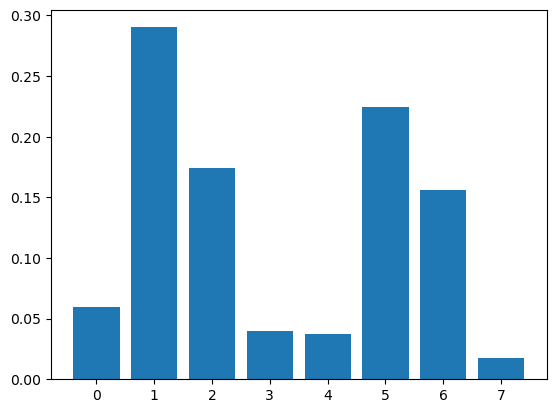

In [94]:
import matplotlib.pyplot as plt

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()